# Aula 12 - Redes Perceptron com Sklearn - Parte 1

Vamos utilizar o [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) para modelar Redes Neruais baseadas no Perceptron

In [3]:
# Apenas para evitar warnings 
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de Data Science
import pandas as pd
import seaborn as sns 

# Separação dos dados
from sklearn.model_selection import train_test_split

# Modelos a serem utilizados
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Métricas de avaliação
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

## Lendo o dataset

Como se trata de um dataset MUITO famoso em Ciência de Dados, o próprio sklearn já possui os dados salvos

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Podemos fuçar em parâmetros prontos do dataset, por exemplo, o nome das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Transformando em Dataframe Pandas: 
#   - os dados são iris.data
#   - as colunas são os nomes das características
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["class"] = iris.target # as classes são os targets do dataset

In [7]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Dividindo os dados em TREINO e TESTE

In [8]:
X = data.drop(columns=["class"])  # As features são todos os dados, exceto os labels
y = data["class"]                 # Os labels são as classes que queremos classificar automaticamente

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   random_state=42)

## Perceptron

Vamos começar trabalhando com uma rede bem básica: o Perceptron

In [9]:
# Cria um perceptron e o treina (com o fit())
perceptron = Perceptron(random_state=42)
perceptron.fit(x_train, y_train)

Perceptron(random_state=42)

In [10]:
# Salva as predições do TESTE na variável y_pred
y_pred = perceptron.predict(x_test)

In [11]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

In [12]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: class, dtype: int32

In [13]:
# Calcula a acurácia deste perceptron, por meio dos valores preditos para o teste
# e os valores reais 
accuracy_score(y_pred, y_test)

0.6333333333333333

In [14]:
# Estes são os pesos já treinados, sendo 3 classes (linhas) e 4 colunas (features)
perceptron.coef_

array([[  3. ,   7.9, -12.5,  -5.2],
       [ 15.9, -33.3,   6.1, -24.9],
       [-27.6, -24.9,  27.8,  27.4]])

In [15]:
# Estes são os bias do perceptron
perceptron.intercept_

array([  2.,  14., -13.])

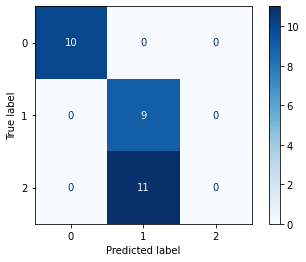

In [16]:
# Matriz de confusão do perceptron
plot_confusion_matrix(perceptron, x_test, y_test, cmap="Blues");

## Uma análise do resultado do Perceptron

Resultado não foi muito bom ne? Mas faz sentido porque esse tipo de rede resolve bem problemas LINEARMENTE SEPARÁVEIS. Será que é o caso deste dataset? 

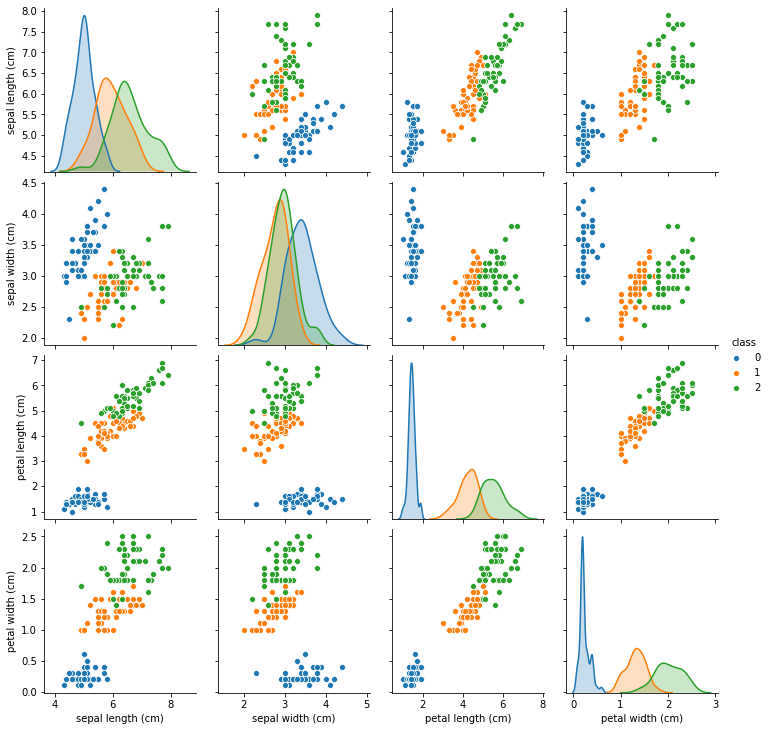

In [17]:
sns.pairplot( data=data, vars=('sepal length (cm)', \
                               'sepal width (cm)', \
                               'petal length (cm)', \
                               'petal width (cm)'), \
             hue='class' );

## Multi-layer Perceptron (MLP)

Veja [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) todos os parâmetros e seus significados.

Vamos começar com a arquitetura mais simples: 

![Arquitetura inicial](https://miro.medium.com/max/381/1*Pff-9bCGTqE6iMW2sBSTmw.png)

Iteration 1, loss = 2.08037493
Iteration 2, loss = 2.06532354
Iteration 3, loss = 2.05033268
Iteration 4, loss = 2.03525767
Iteration 5, loss = 2.02015639
Iteration 6, loss = 2.00505941
Iteration 7, loss = 1.99005943
Iteration 8, loss = 1.97508232
Iteration 9, loss = 1.96009013
Iteration 10, loss = 1.94520369
Iteration 11, loss = 1.93042694
Iteration 12, loss = 1.91568140
Iteration 13, loss = 1.90103579
Iteration 14, loss = 1.88631849
Iteration 15, loss = 1.87144170
Iteration 16, loss = 1.85650081
Iteration 17, loss = 1.84135841
Iteration 18, loss = 1.82623030
Iteration 19, loss = 1.81102525
Iteration 20, loss = 1.79576661
Iteration 21, loss = 1.78057518
Iteration 22, loss = 1.76543617
Iteration 23, loss = 1.75043564
Iteration 24, loss = 1.73557174
Iteration 25, loss = 1.72086287
Iteration 26, loss = 1.70630537
Iteration 27, loss = 1.69190475
Iteration 28, loss = 1.67767132
Iteration 29, loss = 1.66362040
Iteration 30, loss = 1.64973531
Iteration 31, loss = 1.63601784
Iteration 32, los

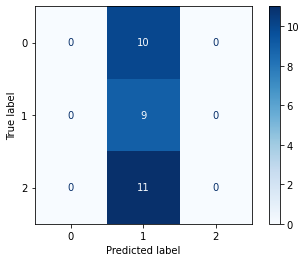

In [25]:
#Arquitetura 
mlp = MLPClassifier(hidden_layer_sizes=(5,), 
                    random_state=1, verbose=True, 
                    max_iter=50)
mlp.fit(x_train, y_train)  
plot_confusion_matrix(mlp, x_test, y_test, cmap='Blues');

### Ajustando parâmetros...

Comparando os diferentes resultados alcançados com a alteração de parâmetros, fica clara (mais uma vez) a **importância de ajustar esses parâmetros**.

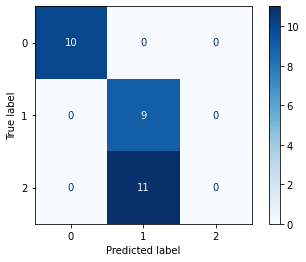

In [19]:
#Alterando a função de ativação...
mlp = MLPClassifier(hidden_layer_sizes=(5,), 
                    random_state=1,
                   activation="logistic")
mlp.fit(x_train, y_train)  
plot_confusion_matrix(mlp, x_test, y_test, cmap='Blues');

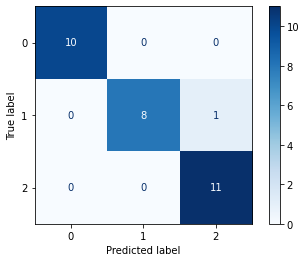

In [26]:
#Alterando o solver para o que a própria documentação aconselha para datasets menores
mlp = MLPClassifier(hidden_layer_sizes=(8,), 
                    random_state=1,
                   activation="logistic",
                   solver="lbfgs")
mlp.fit(x_train, y_train)  
plot_confusion_matrix(mlp, x_test, y_test, cmap='Blues');

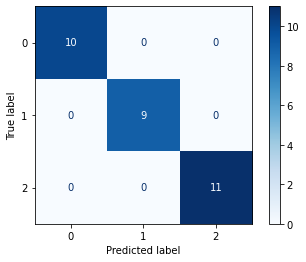

In [21]:
#Testando outra arquitetura...
mlp = MLPClassifier(hidden_layer_sizes=(5,3), 
                    random_state=1,
                   solver="lbfgs")
mlp.fit(x_train, y_train)  
plot_confusion_matrix(mlp, x_test, y_test, cmap='Blues');

### Pesos da rede

In [22]:
print("pesos entre a camada de ENTRADA (4 neurônios) e a 1ª CAMADA OCULTA (5 neurônios):")
print(mlp.coefs_[0])
print("\npesos entre 1ª CAMADA OCULTA (5 neurônios) e a 2ª CAMADA OCULTA (3 neurônios):")
print(mlp.coefs_[1])
print("\npesos entre 2ª CAMADA OCULTA (3 neurônios) e camada de SAÍDA (3 neurônios):")
print(mlp.coefs_[2])

pesos entre a camada de ENTRADA (4 neurônios) e a 1ª CAMADA OCULTA (5 neurônios):
[[-0.13512782 -2.37362249 -0.81405264 -1.63424464 -0.57525019]
 [-0.66386755 -1.72649792 -0.25150093 -5.08666135  0.06321219]
 [-0.13158994 -1.92983497 -0.48129295  6.12647349 -0.76963881]
 [ 0.27760256 -0.90181416  0.09557508 12.06443889 -0.49163502]]

pesos entre 1ª CAMADA OCULTA (5 neurônios) e a 2ª CAMADA OCULTA (3 neurônios):
[[  0.68158891  -0.71673717  -0.79617295]
 [ -0.44372149  -1.16101392  -0.69376007]
 [ -0.13626777   0.79089498   0.05728512]
 [-14.75809176  -4.95742429   6.47896099]
 [  0.57798605  -0.83204213   0.43206465]]

pesos entre 2ª CAMADA OCULTA (3 neurônios) e camada de SAÍDA (3 neurônios):
[[ 1.55147476  6.96381426 -8.83360868]
 [ 8.39143676 -1.55585576 -6.85555564]
 [-8.35469438  3.40473785  3.61013366]]
